## Clustering asthma-related papers in CORD-19 dataset

### Introduction
The goal of this project is to explore research topics in asthma and coronviruses. What are the most popular topics the research community is focused on, before and after the COVID-19 outbreak? Are the areas of interest around asthma and coronaviruses the same before and after the appearance of SARS-CoV-2? 

In this project, I use Natural Language Processing (NLP) techniques in Python, to explore topics of research between asthma and coronaviruses before the identification of SARS-CoV-2, but also after the outbreak of the pandemic. The analysis is based on clustering scientific publications, in order to create groups of papers with similar topics. Two groups of clusters are created, one for papers published before and one for papers published after the COVID-19 outbreak. For the two periods of times, clustering aims at identifying popular research topics and finding potential gaps in research between asthma and the new coronavirus.

More details about the motivation and the scientific background of this data analysis can be found here:

### Data
In response to the COVID-19 pandemic a large database, the COVID-19 Open Research Dataset (CORD-19), was created and has been made publicly available. CORD-19 is a resource of hundreds of thousands scholarly articles, about COVID-19, SARS-CoV-2, and related coronaviruses: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

### Collecting and Preprocessing Data

From this large database, I keep only those papers where the word "asthma" appears at least once in the abstract.

I went through the following text preprocessing steps, using NLTK and SpaCy:
- Removal of stop words
- Removal of non-English publications

Using their publication date, I divided the papers into those published before the outbreak of the pandemic (December 2019) and those published after. For the two groups of papers I applied:
- Tokenization
- Stemming
- Use of the Scikit-learn's Tfidf Vectorizer to transform tokens into a matrix of TF-IDF features
- Application of the KMeans algorithm for Clustering
- Application of the PCA algorithm for dimensionality reduction and clusters' visualization

*Note: This data analysis was performed in February 2021 and doesn't take into account potential databases updates.*


### Loading libraries

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

In [74]:
pd.options.display.max_colwidth = 200

In [3]:
import nltk
import string
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from langdetect import detect

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

In [5]:
import plotly.express as px
import plotly.io as pio
pio.renderers
import plotly.graph_objects as go

import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator


In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")


In [7]:
spacy_stop_words = ['whence', 'here', 'show', 'were', 'why', 'n’t', 'the', 'whereupon', 'not', 'more', 'how', 'eight', 'indeed', 'i', 'only', 'via', 'nine', 're', 'themselves', 'almost', 'to', 'already', 'front', 'least', 'becomes', 'thereby', 'doing', 'her', 'together', 'be', 'often', 'then', 'quite', 'less', 'many', 'they', 'ourselves', 'take', 'its', 'yours', 'each', 'would', 'may', 'namely', 'do', 'whose', 'whether', 'side', 'both', 'what', 'between', 'toward', 'our', 'whereby', "'m", 'formerly', 'myself', 'had', 'really', 'call', 'keep', "'re", 'hereupon', 'can', 'their', 'eleven', '’m', 'even', 'around', 'twenty', 'mostly', 'did', 'at', 'an', 'seems', 'serious', 'against', "n't", 'except', 'has', 'five', 'he', 'last', '‘ve', 'because', 'we', 'himself', 'yet', 'something', 'somehow', '‘m', 'towards', 'his', 'six', 'anywhere', 'us', '‘d', 'thru', 'thus', 'which', 'everything', 'become', 'herein', 'one', 'in', 'although', 'sometime', 'give', 'cannot', 'besides', 'across', 'noone', 'ever', 'that', 'over', 'among', 'during', 'however', 'when', 'sometimes', 'still', 'seemed', 'get', "'ve", 'him', 'with', 'part', 'beyond', 'everyone', 'same', 'this', 'latterly', 'no', 'regarding', 'elsewhere', 'others', 'moreover', 'else', 'back', 'alone', 'somewhere', 'are', 'will', 'beforehand', 'ten', 'very', 'most', 'three', 'former', '’re', 'otherwise', 'several', 'also', 'whatever', 'am', 'becoming', 'beside', '’s', 'nothing', 'some', 'since', 'thence', 'anyway', 'out', 'up', 'well', 'it', 'various', 'four', 'top', '‘s', 'than', 'under', 'might', 'could', 'by', 'too', 'and', 'whom', '‘ll', 'say', 'therefore', "'s", 'other', 'throughout', 'became', 'your', 'put', 'per', "'ll", 'fifteen', 'must', 'before', 'whenever', 'anyone', 'without', 'does', 'was', 'where', 'thereafter', "'d", 'another', 'yourselves', 'n‘t', 'see', 'go', 'wherever', 'just', 'seeming', 'hence', 'full', 'whereafter', 'bottom', 'whole', 'own', 'empty', 'due', 'behind', 'while', 'onto', 'wherein', 'off', 'again', 'a', 'two', 'above', 'therein', 'sixty', 'those', 'whereas', 'using', 'latter', 'used', 'my', 'herself', 'hers', 'or', 'neither', 'forty', 'thereupon', 'now', 'after', 'yourself', 'whither', 'rather', 'once', 'from', 'until', 'anything', 'few', 'into', 'such', 'being', 'make', 'mine', 'please', 'along', 'hundred', 'should', 'below', 'third', 'unless', 'upon', 'perhaps', 'ours', 'but', 'never', 'whoever', 'fifty', 'any', 'all', 'nobody', 'there', 'have', 'anyhow', 'of', 'seem', 'down', 'is', 'every', '’ll', 'much', 'none', 'further', 'me', 'who', 'nevertheless', 'about', 'everywhere', 'name', 'enough', '’d', 'next', 'meanwhile', 'though', 'through', 'on', 'first', 'been', 'hereby', 'if', 'move', 'so', 'either', 'amongst', 'for', 'twelve', 'nor', 'she', 'always', 'these', 'as', '’ve', 'amount', '‘re', 'someone', 'afterwards', 'you', 'nowhere', 'itself', 'done', 'hereafter', 'within', 'made', 'ca', 'them']

In [8]:
# extending the list of stopwords taken into account
stop_words.extend(spacy_stop_words)

### Data overview

In [75]:
# Loading the csv file to a pandas dataframe, to have a look at the papers' metadata:
asthma_df = pd.read_csv("asthma_data.csv")
asthma_df.head()

,gitcord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_lower,title_lower
0,qva0jt86,4ba79e54ecf81b30b56461a6aec2094eaf7b7f06,PMC,Relevance of human metapneumovirus in exacerbations of COPD,10.1186/1465-9921-6-150,PMC1334186,16371156.0,cc-by,"BACKGROUND AND METHODS: Human metapneumovirus (hMPV) is a recently discovered respiratory virus associated with bronchiolitis, pneumonia, croup and exacerbations of asthma. Since respiratory virus...",2005-12-21,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/4ba79e54ecf81b30b56461a6aec2094eaf7b7f06.json,document_parses/pmc_json/PMC1334186.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1334186/,NaN,"background and methods: human metapneumovirus (hmpv) is a recently discovered respiratory virus associated with bronchiolitis, pneumonia, croup and exacerbations of asthma. since respiratory virus...",relevance of human metapneumovirus in exacerbations of copd
1,chz8luni,d68d71553d3a31381c0c3851351f912a9a7be1c9,PMC,Surfactant therapy for acute respiratory failure in children: a systematic review and meta-analysis,10.1186/cc5944,PMC2206432,17573963.0,cc-by,"INTRODUCTION: Exogenous surfactant is used to treat acute respiratory failure in children, although the benefits and harms in this setting are not clear. The objective of the present systematic re...",2007-06-15,...,Crit Care,NaN,NaN,NaN,document_parses/pdf_json/d68d71553d3a31381c0c3851351f912a9a7be1c9.json,document_parses/pmc_json/PMC2206432.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2206432/,NaN,"introduction: exogenous surfactant is used to treat acute respiratory failure in children, although the benefits and harms in this setting are not clear. the objective of the present systematic re...",surfactant therapy for acute respiratory failure in children: a systematic review and meta-analysis
2,3zh8jmc2,fe2000f280297c40bc53ce95d703a9ca6aac19fd,PMC,Differential Regulation of Type I Interferon and Epidermal Growth Factor Pathways by a Human Respirovirus Virulence Factor,10.1371/journal.ppat.1000587,PMC2736567,19806178.0,cc-by,"A number of paramyxoviruses are responsible for acute respiratory infections in children, elderly and immuno-compromised individuals, resulting in airway inflammation and exacerbation of chronic d...",2009-09-18,...,PLoS Pathog,NaN,NaN,NaN,document_parses/pdf_json/fe2000f280297c40bc53ce95d703a9ca6aac19fd.json,document_parses/pmc_json/PMC2736567.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2736567/,NaN,"a number of paramyxoviruses are responsible for acute respiratory infections in children, elderly and immuno-compromised individuals, resulting in airway inflammation and exacerbation of chronic d...",differential regulation of type i interferon and epidermal growth factor pathways by a human respirovirus virulence factor
3,7p3b6tyf,3ccbd07ee1865e4f2afffdb6cc8b6039ab605ee7,PMC,"The Tennessee Children's Respiratory Initiative: Objectives, design and recruitment results of a prospective cohort study investigating infant viral respiratory illness and the development of asth...",10.1111/j.1440-1843.2010.01743.x,PMC2992986,20409023.0,no-cc,"Background and objective: The ‘attack rate’ of asthma following viral lower respiratory tract infections (LRTI) is about 3–4 fold higher than that of the general population; however, the majority ...",2010-04-08,...,Respirology,NaN,NaN,NaN,document_parses/pdf_json/3ccbd07ee1865e4f2afffdb6cc8b6039ab605ee7.json,document_parses/pmc_json/PMC2992986.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2992986/,NaN,"background and objective: the ‘attack rate’ of asthma following viral lower respiratory tract infections (lrti) is about 3–4 fold higher than that of the general population; however, the majority ...","the tennessee children's respiratory initiative: objectives, design and recruitment results of a prospective cohort study investigating

There are 2567 papers containing the word "asthma", among the coronavirus-related publications 

In [10]:
asthma_df.shape

(2567, 21)

In [11]:
# Use of langdetect google library to dect the language of the "abstract" column in our dataframe

asthma_df["lang_detect"] = asthma_df["abstract_lower"].apply(detect)

In [12]:
# As non-english papers occupy only a small percent of our total papers, they are excluded from the analysis

asthma_df["lang_detect"].value_counts()

en    2530
fr      12
de      11
es       6
ru       3
pt       3
nl       2
Name: lang_detect, dtype: int64

There are 2528 papers in total, written in english.

In [13]:
asthma_df = asthma_df.loc[asthma_df['lang_detect'] == "en"]
asthma_df.shape

(2530, 22)

I'd like to quickly vizualize the text of these papers, that's why I create a wordcloud where the most frequent words are represented by a bigger font! I'd like to give a shape to my image and use it as a cover for my article! What would it be?

In [14]:
virus_mask = np.array(Image.open("coronavirus_canvas.png"))

In [15]:
text = " ".join(ab for ab in asthma_df["abstract_lower"].tolist())

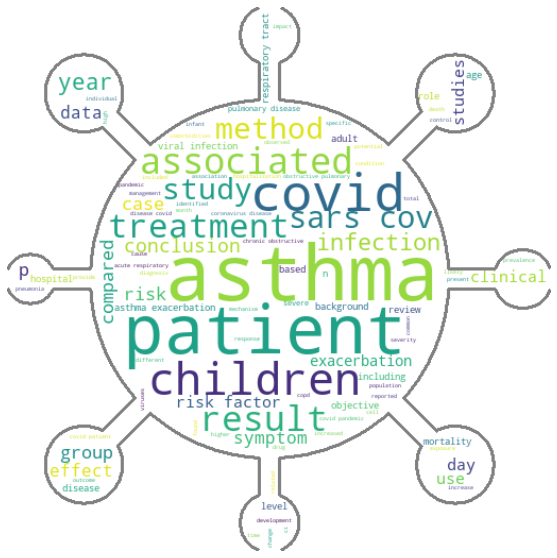

In [16]:
wc = WordCloud(background_color="white", max_words=100, mask=virus_mask,
               stopwords=stop_words, contour_width=3, contour_color='gray')

wc.generate(text)

wc.to_file("coronavirus_new.png")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's go back to data processing!


Papers are divided between those published before the identification of the new coronavirus, SARS-CoV-2, and those published after. I pick December 2019 as the cut-off date.

In [17]:
asthma_before_covid = asthma_df.loc[asthma_df['publish_time']<"2019-12-01"].reset_index(drop=True)
asthma_after_covid = asthma_df.loc[asthma_df['publish_time']>="2019-12-01"].reset_index(drop=True)

Let's have a look at the number of the papers published, per month, since the covid outbreak. 

In [18]:
asthma_after_covid['publish_time_new'] =  pd.to_datetime(asthma_after_covid['publish_time'])

In [19]:
asthma_after_covid['publish_month_year'] = pd.to_datetime(asthma_after_covid['publish_time']).dt.to_period('M')
asthma_after_covid.head()

,gitcord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_lower,title_lower,lang_detect,publish_time_new,publish_month_year
0,3ki0dzwb,71b8c50ee0e1f4e79e6618301b768befbf943a5d,PMC,Inflammatory and microbiological associations with near-fatal asthma requiring extracorporeal membrane oxygenation,10.1183/23120541.00267-2019,PMC6983494,32010717.0,cc-by-nc,Patients with near-fatal asthma requiring ECMO are more likely to be younger and female and are also likely to have positive viral and fungal isolates on bronchoalveolar lavage when compared to those receiving conventional mechanical ventilation http://bit.ly/2S38SaC,2020-01-27,...,NaN,document_parses/pdf_json/71b8c50ee0e1f4e79e6618301b768befbf943a5d.json,document_parses/pmc_json/PMC6983494.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6983494/,NaN,patients with near-fatal asthma requiring ecmo are more likely to be younger and female and are also likely to have positive viral and fungal isolates on bronchoalveolar lavage when compared to those receiving conventional mechanical ventilation http://bit.ly/2s38sac,inflammatory and microbiological associations with near-fatal asthma requiring extracorporeal membrane oxygenation,en,2020-01-27,2020-01
1,okc7wf4n,f4edbfd3e9a8b2d0d76378e6588a5971b070a4c9,PMC,Different effects of acetyl-CoA carboxylase inhibitor TOFA on airway inflammation and airway resistance in a mice model of asthma,10.1007/s43440-019-00027-8,PMC7223088,32048254.0,no-cc,"BACKGROUND AND OBJECTIVE: Acetyl CoA carboxylase (ACC) regulates the differentiation of Th1, Th2, Th17 cells and Treg cells, which play a critical role in airway inflammation of asthma. Here we investigated the role of ACC in the pathogenesis of asthma. METHODS: Chicken Ovalbumin-sensitized and -challenged mice were divided into three groups, PBS group, DMSO (solvent of TOFA) group and ACC inhibitor 5-tetradecyloxy-2-furoic acid (TOFA) + DMSO group. Airway inflammation was assessed with hist...",2020-01-08,...,NaN,document_parses/pdf_json/f4edbfd3e9a8b2d0d76378e6588a5971b070a4c9.json,document_parses/pmc_json/PMC7223088.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7223088/,NaN,"background and objective: acetyl coa carboxylase (acc) regulates the differentiation of th1, th2, th17 cells and treg cells, which play a critical role in airway inflammation of asthma. here we investigated the role of acc in the pathogenesis of asthma. methods: chicken ovalbumin-sensitized and -challenged mice were divided into three groups, pbs group, dmso (solvent of tofa) group and acc inhibitor 5-tetradecyloxy-2-furoic acid (tofa) + dmso group. airway inflammation was assessed with hist...",different effects of acetyl-coa carboxylase inhibitor tofa on airway inflammation and airway resistance in a mice model of asthma,en,2020-01-08,2020-01
2,8lqjl0ee,1f6fa8e138abc1556e853c53dcce8f5e16007fcc,PMC,Risk of Readmission and Mortality Following Hospitalization with Hypercapnic Respiratory Failure,10.1007/s00408-019-00300-w,PMC7223622,31828514.0,no-cc,PURPOSE: Hypercapnic respiratory failure (HRF) is a frequent cause of hospitalization and a common comorbidity in hospitalized patients. There are few studies addressing what factors might predict poor outcomes in this patient population. The purpose of the current study was to investigate characteristics and outcomes of patients hospitalized with HRF. METHODS: A study of patients ≥ 18 years admitted with HRF in a 1-year period. Patients with limited life expectancy related to other conditio...,2019-12-11,...,NaN,document_parses/pdf_json/1f6fa8e138abc1556e853c53dcce8f5e16007fcc.json,document_parses/pmc_json/PMC7223622.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7223622/,NaN,purpose: hypercapnic respiratory failure (hrf) is a frequent cause of hospitalization and a common comorbidity in hospitalized patients. there are few studies addressing what factors might predict poor o

In [20]:
asthma_after_covid = asthma_after_covid.sort_values('publish_month_year')

In [21]:
dates = asthma_after_covid["publish_month_year"].value_counts()

In [22]:
dates_df = dates.to_frame().reset_index()

In [23]:
dates_df = dates_df.sort_values("index")
dates_df.rename(columns={"index": "date_published", "publish_month_year":"number of papers"})

,date_published,number of papers
12,2019-12,10
0,2020-01,600
13,2020-02,9
14,2020-03,8
11,2020-04,19
8,2020-05,69
7,2020-06,74
3,2020-07,92
9,2020-08,60
4,2020-09,90


The graph below illustrates the number of papers published through the last 12-14 months. However, we recognize that the two picks noticed in January 2020 and January 2021 are not completely accurate. As a certain number of papers had only the year (yyyy) mentioned as publication date, January 1st of that year (01/01/yyyy) is taken as their complete date.

As a result, we cannot draw a very accurate example of the distribution of publications through the months.

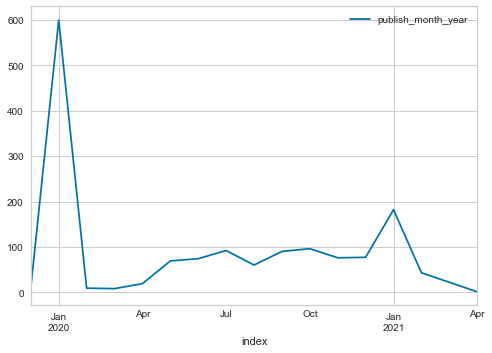

In [24]:
dates_df.plot(x ='index', y = 'publish_month_year')

## Clustering

### Before COVID-19

In [25]:
texts_before = asthma_before_covid["abstract_lower"].tolist()

In [26]:
def custom_tokenizer(str_input):
    
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(str_input)
    words = [word for word in words if word.lower() not in stop_words]
    
    words = [word.replace('â¡', '') for word in words]
    words = [word.replace('â¢', '') for word in words]
    words = [word.replace('â£', '') for word in words]
       
    words = [''.join(c for c in word if c not in string.punctuation+'©±×≤≥●＜--“”→„') for word in words]
    words = [word for word in words if word not in ['‘', '’', '„']]
        
    words = [word for word in words if word]
    words = [word for word in words if not any(char.isdigit() for char in word)]
    
    words = [stemmer.stem(word) for word in words]
    words = [word for word in words if len(word)> 1]
    words = [word for word in words if "asthma" not in word]
    
        
    return words

In [27]:
vec_before = TfidfVectorizer(tokenizer=custom_tokenizer,
                             max_features=2000,
                      stop_words='english')

matrix_before = vec_before.fit_transform(texts_before)
df_before = pd.DataFrame(matrix_before.toarray(), columns=vec_before.get_feature_names())
df_before.head()

c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cri', 'describ', 'sincer'] not in stop_words.



,aa,abdelbaset,abil,abl,abnorm,absenc,absent,absolut,abstract,abuelmagd,...,yoonseok,youn,young,younger,younghe,youngho,yr,yu,yun,zhang
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For more information about the use of Kmeans in clustering: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [28]:
def vizualize_elbow(data, min_cluster=4, max_cluster=20):
    
    model = KMeans(random_state=2)
    visualizer = KElbowVisualizer(model, k=(min_cluster, max_cluster))

    visualizer.fit(data)
       
    return visualizer  

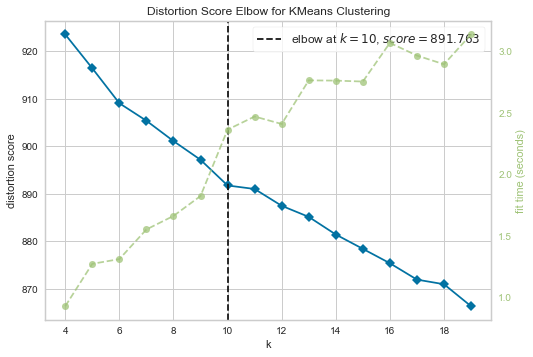

In [29]:
viz_before = vizualize_elbow(matrix_before)
viz_before.show()

In [30]:
number_of_clusters=10
km_before = KMeans(n_clusters=number_of_clusters, random_state=1)
km_before.fit(matrix_before)

KMeans(n_clusters=10, random_state=1)

Let's have an overview of our clusters' centers (centroids) and labels. Then we get the top 20 terms for every cluster. In other words, we see which are the most frequently mentioned words per cluster. Note that since we have applied Stemming, we only have the "root" of the words now.

In [31]:
centroids_before, labels_before = km_before.cluster_centers_, km_before.labels_
print(centroids_before)

[[0.00000000e+00 0.00000000e+00 2.49994942e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.11068788e-03 0.00000000e+00 1.94843332e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.63733556e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.09440670e-03 0.00000000e+00 7.22709010e-04 ... 1.20850175e-04
  8.14867800e-05 8.63215533e-05]
 [0.00000000e+00 0.00000000e+00 5.81609569e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.25847775e-04 2.69228650e-03 ... 0.00000000e+00
  7.09136615e-05 0.00000000e+00]]


In [32]:
print("Top terms per cluster:")
order_centroids_before = centroids_before.argsort()[:, ::-1]
terms = vec_before.get_feature_names()
for i in range(number_of_clusters):
    top_words = [terms[ind] for ind in order_centroids_before[i, :20]]
    print("Cluster {}: {}".format(i, ' '.join(top_words)))

Top terms per cluster:
Cluster 0: wheez children risk recurr age year earli ill factor episod sensit associ viral respiratori infect infant rv develop childhood rhinoviru
Cluster 1: cell airway express inflamm activ respons infect inflammatori epitheli protein macrophag mice allerg increas diseas lung function role immun cytokin
Cluster 2: exacerb trigger infect patient treatment respiratori copd virus viral current diseas sever review factor therapi chronic risk acut airway associ
Cluster 3: children pneumonia patient respiratori detect infect influenza hospit viru virus exacerb hmpv clinic sampl case acut year hbov rhinoviru pathogen
Cluster 4: bronchiol rsv children infant wheez respiratori hospit rhinoviru viru age infect syncyti caus acut sever develop year viral common recurr
Cluster 5: subject infect day patient group level viral exacerb cold symptom airway increas significantli studi nasal respiratori sputum control children acut
Cluster 6: hrv hrvc infect children human respir

In [33]:
order_centroids_before

array([[1961,  296, 1589, ..., 1125, 1126,    0],
       [ 273,   75,  648, ..., 1003, 1002,  999],
       [ 624, 1869,  889, ..., 1096, 1101,    0],
       ...,
       [1322,  762,  308, ...,  200,  199, 1857],
       [ 889, 1931, 1570, ..., 1036, 1037,    0],
       [ 518, 1475, 1056, ...,  949,  947,    0]], dtype=int64)

For more information about PCA and its implementation in Python:
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [77]:
T_before = preprocessing.Normalizer().fit_transform(df_before)

# Fit and transform the TFidf values to PCA
pca_model = PCA(n_components=2, random_state = 2)
pca_model.fit(T_before) 
T_before = pca_model.transform(T_before)

#Transform the centroids
centroids_before_pca = pca_model.transform(centroids_before)

In [78]:
asthma_before_covid['Labels'] = km_before.labels_
asthma_before_covid['pca_1'] = T_before[:, 0]
asthma_before_covid['pca_2'] = T_before[:, 1]

In [79]:
asthma_before_covid = asthma_before_covid.sort_values(by = "Labels", ascending = True)

In [80]:
asthma_before_covid['Labels'] = asthma_before_covid['Labels'].astype(str)

In [81]:
asthma_before_covid['Labels'].value_counts().sort_values(ascending=True)

4     41
6     43
2     60
0     62
5    110
8    116
1    123
3    144
9    161
7    164
Name: Labels, dtype: int64

In [82]:
fig = px.scatter(asthma_before_covid, 
                 x="pca_1", 
                 y="pca_2", 
                 color="Labels",
                 hover_data=['title'])

In [86]:
fig = px.scatter(centroids_before_pca,


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [0, 1] but received: pca_1

In [84]:
fig.update_layout(
    title_text='Asthma and various coronaviruses',
    legend=dict(
        font=dict(
            size=20)))

Below, we also get the number of features, in our case the number of papers that each cluster contains.

In [41]:
asthma_before_covid['Labels'].value_counts().sort_values(ascending=False)

7    164
9    161
3    144
1    123
8    116
5    110
0     62
2     60
6     43
4     41
Name: Labels, dtype: int64

#### After covid-19

In [42]:
texts_after = asthma_after_covid["abstract_lower"].tolist()

In [43]:
vec_after = TfidfVectorizer(tokenizer=custom_tokenizer,
                      stop_words='english', 
                           max_features=1000)
matrix_after = vec_after.fit_transform(texts_after)
df_after = pd.DataFrame(matrix_after.toarray(), columns=vec_after.get_feature_names())


c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cri', 'describ', 'sincer'] not in stop_words.



In [44]:
df_after.head()

,abil,abl,abnorm,absenc,abstract,access,accord,account,accumul,achiev,...,world,worldwid,wors,worsen,wuhan,year,york,young,younger,youth
0,0.0,0.0,0.0,0.0,0.094455,0.0,0.084762,0.093501,0.0,0.0,...,0.080288,0.0,0.0,0.0,0.0,0.153021,0.0,0.101616,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.076325,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


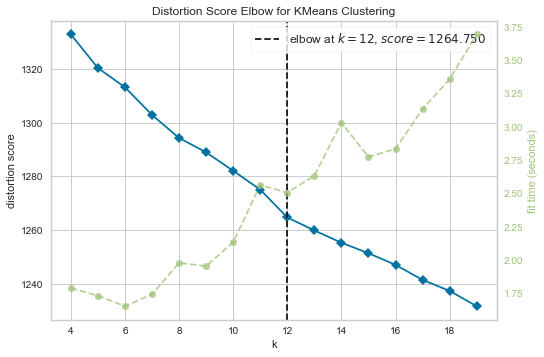

In [45]:
viz_after = vizualize_elbow(matrix_after)
viz_after.show()

In [46]:
number_of_clusters=15
km_after = KMeans(n_clusters=number_of_clusters, random_state=1)
km_after.fit(matrix_after)
km_after.fit

<bound method KMeans.fit of KMeans(n_clusters=15, random_state=1)>

In [47]:
centroids_after, labels_after = km_after.cluster_centers_, km_after.labels_
print(centroids_after)

[[0.         0.00501763 0.         ... 0.         0.         0.        ]
 [0.         0.00237794 0.00910511 ... 0.0062841  0.00455999 0.        ]
 [0.00214067 0.         0.0101556  ... 0.01108974 0.02309375 0.0181394 ]
 ...
 [0.0015346  0.         0.00961772 ... 0.004297   0.00333466 0.        ]
 [0.00082742 0.00138789 0.         ... 0.00192106 0.00418055 0.01290504]
 [0.00638994 0.00376184 0.00258124 ... 0.         0.         0.        ]]


In [48]:
print("Top terms per cluster:")
order_centroids_after = km_after.cluster_centers_.argsort()[:, ::-1]
terms = vec_after.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids_after[i, :20]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: air pollut health lockdown exposur human pm impact particul qualiti environment matter effect respiratori citi reduc econom level associ children
Cluster 1: patient hospit symptom test sever clinic studi posit age diseas infect year result day risk case comorbid report vs factor
Cluster 2: children infect respiratori hospit year symptom sever patient age risk studi medic diseas adult clinic control present detect home viru
Cluster 3: case patient diseas present coronaviru report sever respiratori acut bilater day infect symptom caus pneumonia syndrom clinic treatment chest lung
Cluster 4: drug allerg allergi biolog patient treatment diseas medicin pandem sever clinic therapi recommend manag effect provid respons challeng care studi
Cluster 5: telemedicin care patient provid physician health healthcar medic servic pandem visit staff deliv educ manag practic review use virtual technolog
Cluster 6: ci patient hospit risk copd associ diseas outcom mortal a

In [49]:
order_centroids_after

array([[ 37, 663, 389, ..., 539, 536,   0],
       [634, 404, 901, ..., 331, 311,   0],
       [142, 444, 780, ..., 679, 678, 208],
       ...,
       [634, 264, 164, ..., 708, 326, 999],
       [389, 638, 264, ..., 646, 310, 232],
       [516, 264, 721, ..., 836, 384, 999]], dtype=int64)

In [50]:
T_after = preprocessing.Normalizer().fit_transform(df_after)
# Dimesionality reduction to 2
pca_model = PCA(n_components=2, random_state=2)
pca_model.fit(T_after) 
T_after = pca_model.transform(T_after) 

In [51]:
asthma_after_covid['Labels'] = km_after.labels_
asthma_after_covid['pca_1'] = T_after[:, 0]
asthma_after_covid['pca_2'] = T_after[:, 1]

In [52]:
asthma_after_covid = asthma_after_covid.sort_values(by = "Labels", ascending = True)

In [53]:
asthma_after_covid['Labels'] = asthma_after_covid['Labels'].astype(str)

In [54]:
fig = px.scatter(asthma_after_covid, 
                 x="pca_1", 
                 y="pca_2", 
                 color="Labels",
                 hover_data=['title'])

In [71]:
fig.update_layout(
    title_text='Asthma in the context of the COVID-19 outbreak',
    legend=dict(
        font=dict(
            size=20)))



In [56]:
asthma_after_covid['Labels'].value_counts().sort_values(ascending=False)

1     184
7     177
12    165
13    135
4     124
3     117
6      98
14     93
2      82
5      81
11     75
8      55
9      52
0      47
10     21
Name: Labels, dtype: int64